## Decision Trees
- Decision trees are a widely used models for classification and regression tasks.
Essentially, they learn a hierarchy of “if-else” questions, leading to a decision.
Imagine you want to distinguish between the following four animals: bears, hawks,
penguins and dolphins.
Your goal is to get to the right answer by asking as few if-else questions as possible.
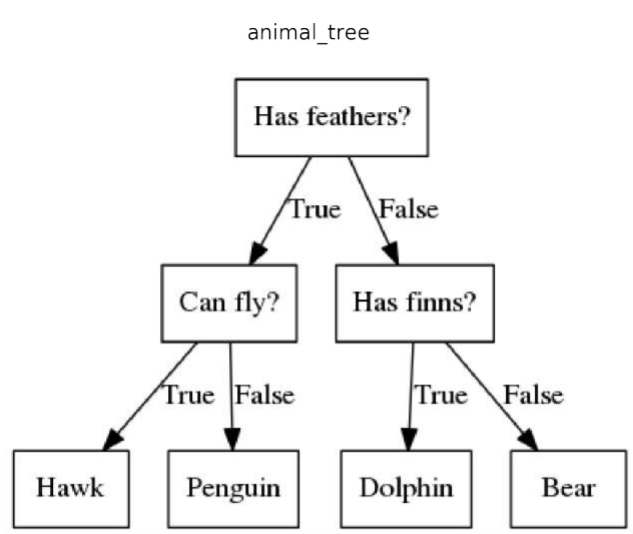


- The deeper the tree, the more complex the decision rules and the fitter the model.

#### Some advantages of decision trees
- Simple to understand and to interpret. Trees can be visualised.

- Requires little data preparation. Other techniques often require data normalisation, 
    dummy variables need to be created and blank values to be removed. 
- Note however that this module does not support missing values.

-  invariant to scaling of the data: As
each feature is processed separately, and the possible splits of the data don't depend
on scaling, no preprocessing like normalization or standardization of features is
needed for decision tree algorithms.
#### Disadvantages of decision trees 
- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

### TREE-BASED MODELS

non-linear models are non-parametric - mainly focusing on individual features not really about the distance

#### Decision Tree / CART (Classification and Regression Tree)

This is a non-parametric supervised learning algorithm which is utilized for both regression and classification tasks. It is a hierarchical, tree structure which consists of root nodes, branches, internal nodes and leaf nodes
- not susceptible to multicolliearity
- no need for normalization - they don't calculate distance
- no need for linearity between target and features
- advanced package that implement decision tree allows missing values
- however, sci-kit learn package doesn't work with missing values

- pure leaf: all the classification belong to one class
- impure leaf: classification contain both classes

#### how to choose thr best feature at each node
- Information Gain: to explain information gain, you need to understand entropy. Entropy is used to measure the impurity of sample values. Entropy values are between 0 and 1. The higher the value of information gain, the more the model is able to measure how a randomly chosen feature will lead to mis-classification. It is giving of the information about the selection of that variable. Information gain represents the difference in entropy before and after a split on a given attribute
- Gini Impurity : Gini is a technique that measures how often a randomly chosen feature is leading to mis-classification / wrong prediction

#### Pros of Decision Tree
- easy to interpret: it is used in the industry a lot because you can easily interpret your result. You can draw the tree and explain how it is making its decision.
- little to no data preparation is required
- more flexible: used for classification and regression

#### Cons of Decision Tree
- prone to overfitting -it will not stop building the tree to a large depth until it gets a very pure tree. When it so sure you have diabetes. In trying to achieve that, it will continue building thetree.this will make the tree very complex and thus leads to overfitting. 

There are 2 methods of preventing overfitting. 
1. Pre-proning; this will stop the tree from being fully built. This cut off the depth of the 3
2. post-proning: Allow the tree to be fully built and then chunk out the portion of the tree that contains less amount of data
3. Using of a forest of tree: instead of looking one tree, we bring different trees and check their performance; this is where random forest comes in 
- more costly: it is more computationally intensive; it is going to calculate the entropy of all features

#### Import required packages

In [2]:
import numpy as np # linear algebra
import pandas as pd  
import matplotlib.pyplot as plt        
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
path = "telecom_churn.csv"

#### AIM
A customer churn project aiming at build a model to predict whether the custumer will leave for another company. Similar projects are employee attrition, etc

In [4]:
# load the data
data = pd.read_csv(path)
data.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


- 0 = customers who do not churn
-1 = customers who churn

In [5]:
# data exploration

data.shape

(3333, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [7]:
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

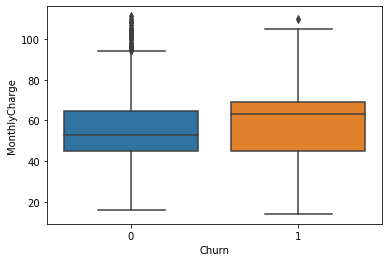

In [8]:
# data visualization
sns.boxplot( data = data, x = "Churn", y = "MonthlyCharge")

- customers who churn have higher monthly charge compared to those who do not churn

#### Data Splitting

In [9]:
data["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [10]:
data["Churn"].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

- imbalanced data

In [11]:
## Select the features
X = data.drop("Churn", axis = 1)
y = data["Churn"]

In [12]:
# split into train, validation and test
# this is how our data should be split in most cases
# all the hyperparameter tuning will be done on validation data
# test data is the standard
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2,
                                                            random_state = 0,
                                                           stratify = y)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val,
                                                 test_size = 0.2,
                                                 random_state = 0,
                                                 stratify = y_train_val)

data is split into three train, validation and test to prevent **information leakage**; everytime we adjust the hyperparameters or tweak the model to improve the performance, we either use the train or validation. The data is only exposed to the test data when we are fully satisfied with the model and we want to see the result on a new data that it has not seen

In [13]:
# we can plot the tree 

x_train.shape

(2132, 10)

In [14]:
x_test.shape

(667, 10)

In [15]:
x_val.shape

(534, 10)

In [16]:
x_train_val.shape

(2666, 10)

### Model performance check

In [17]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],)
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

#### Decision tree implementation in scikit-learn

In [18]:
# import required metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (precision_score,
                            recall_score,
                            f1_score,
                            accuracy_score,
                            precision_recall_curve,
                            roc_auc_score,
                            ConfusionMatrixDisplay,
                            confusion_matrix,
                            roc_curve)

In [19]:
# function to evaluate the model and compute metrics on test data

def evaluate(model, X, y, threshold = 0.5):
    """
    function to evaluate our trained model with different metrics
    model: trained model(classifier)
    X: validation features
    y: target in validation data
    threshold: value to filter prediction
    
    """
    pred_proba= model.predict_proba(X)[:, 1] 
    # : means all the rows 
    # 1 means interested in those with diabetes
    # we can convert probability to 0 or 1
    # any probability less than 0.5 will be 0
    # any probalility greater than 0.5 will be 1
   
    pred_class = np.round(pred_proba > threshold) # convert 0 0r 1
    # remember True is 1;False is 0
    
    acc= accuracy_score(y, pred_class)
    recall= recall_score(y, pred_class)
    precision= precision_score(y, pred_class)
    f1= f1_score(y, pred_class)
    
    df = pd.DataFrame({
        "Accuracy":acc,
        "Precision":precision,
        "Recall":recall,
        "F1": f1
    }, index = [0])
    
    conf = confusion_matrix(y, pred_class, labels = [0,1]) # we have just 2 labels
    disp = ConfusionMatrixDisplay(conf, display_labels = [0,1]) 
    disp.plot() # to display confusion matrix
    plt.show()
    
    return df 

In [20]:
# function to train a model and compute train accuracy

def train(model, X, y):
    """
    function to train the model and compute accuracy
    model: model that is not yet trained
    X: train features
    y: train target
    """
    trained_model = model.fit(X, y) # training the model
    preds = trained_model.predict(X) # making predictions
    acc = accuracy_score(y, preds) # computing accuracy
    print(f"Train Accuracy {acc}") # printing the accuracy
    return trained_model # allows the function to return a trained model

In [21]:
# instatiate the model
dtree = DecisionTreeClassifier(random_state = 0)
# criterion: the function to measure the quality of split 
# gini: the default criterion; for gini impurity
# entropy: for information gain

In [22]:
dtree_model = train(dtree,x_train, y_train)

Train Accuracy 1.0


- the 100 percent in the training accuracy is a clear indication of overfitting
- decision tree by default will overfit. Decision tree is prone to overfitting because it tries to ake sure it correctly classify all the observation in the data (tree to be all pure to one class), this makes the model become complex; this is where pre proning is used
- we dont need to do feature selection in decision tree; decison tree is already doing it for you
- scaling / normalization is not necessary; it wont change anything

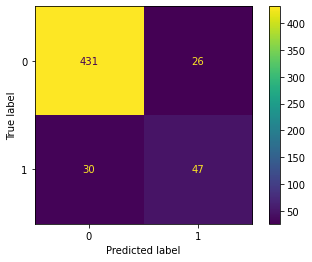

,Accuracy,Precision,Recall,F1
0,0.895131,0.643836,0.61039,0.626667


In [23]:
dtree_df = evaluate(dtree_model, x_val, y_val)
dtree_df

- out of  77 (47+30) that churched, the model correctly predicted 47 and wrongly predicted that 30 did not churn
- out of 73 (47+26) that were predicted to churn, the model got 47 of them an 26 were incorrectly predicted to churn (precision)
- in the industry, with respect to the revenue, should we overlook those that the model said will churn but in reality didnt churn or those that churned and in reality the model said they won't churn? This depend on the objective of the business or how well the industry is willing to balance both. The best way to go about this is to optimize both. A data scientist should be emphatic in response. Precision-recall curve metric can be used to balance both (FP and FN)

#### Visualize the tree

In [24]:
# Define a function to plot the decision tree
# get the feature names
feat_names = list(X.columns)

def plot_decision_tree(dec_tree):
    plt.figure(figsize = (20,30))
    tree.plot_tree(dtree_model, feature_names = feat_names, class_names =True,
                  filled = True, node_ids = True, fontsize =9)
    plt.show()

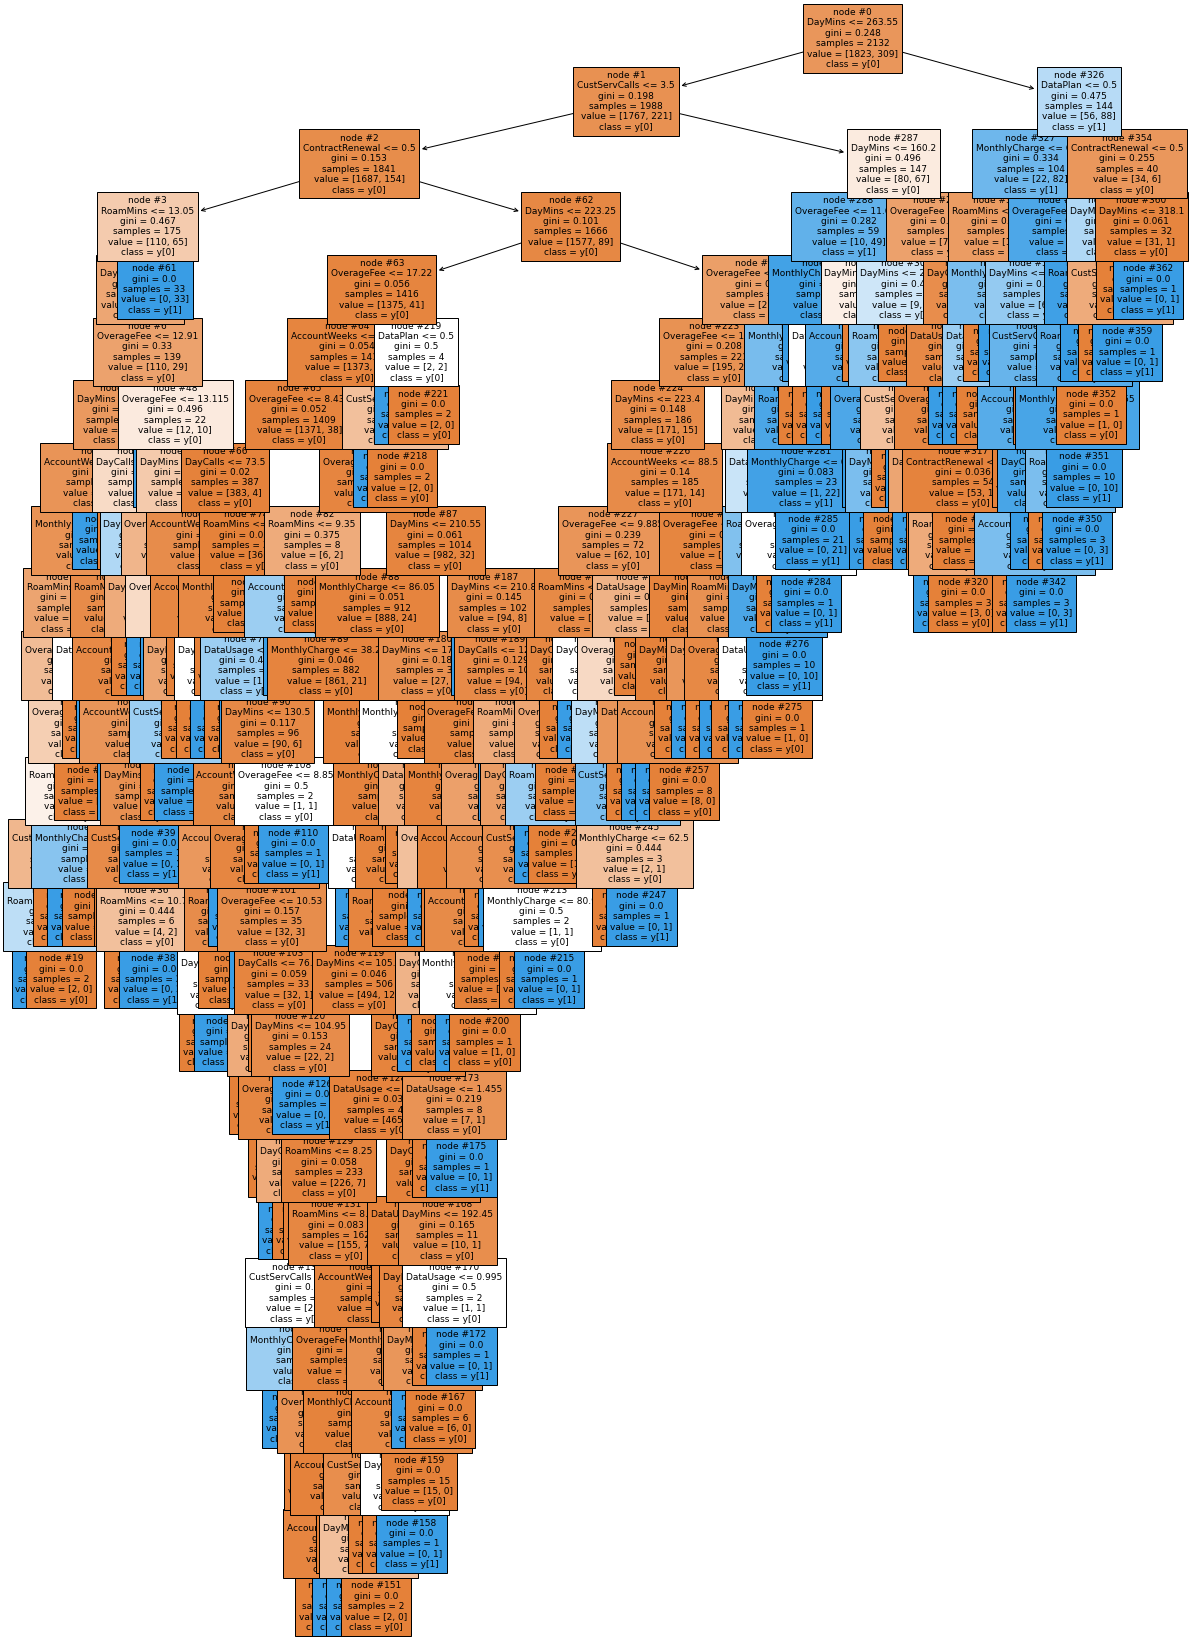

In [32]:
plot_decision_tree(dtree_model)

- the depth is so high; that is why the model is overfitting

#### Model Improvement

- class weight; can also be used in logistic regression. allow the model to focus less on the majority class becuse they are more and focus 90% of the times in detecting the patterns on the minority class. This is done on the training. This should not be mistaken with stratify. Stratify makes sure that the percentage/ proportion of major and minor classes on training data is same as that of testing data or validation

- esemble method

#### Class weight with pre-pruning

#####  Controlling complexity of Decision Trees
- Typically, building a tree as described above, and continuing until all leaves are pure
leads to models that are very complex and highly overfit to the training data. The
presence of pure leaves mean that a tree is 100% accurate on the training set; each
data point in the training set is in a leaf that has the correct majority class.



- There are two common strategies to prevent overfitting: stopping the creation of the
tree early, also called **pre-pruning**, or building the tree but then removing or collapsing 
nodes that contain little information, also called **post-pruning** or just **pruning**. 
Possible criteria for pre-pruning include limiting the maximum depth of the tree,
limiting the maximum number of leaves, or requiring a minimum number of points
in a node to keep splitting it.

In [25]:
dtree2 = DecisionTreeClassifier(random_state = 0, class_weight = {0:0.1, 1:0.9})
# the majority class was given 0.1
# the minority class was given 0.9
# if the target category is the majority class, dont use class weight. This is not common
dtree2_model = train(dtree2, x_train, y_train)
dtree2_model

Train Accuracy 1.0


DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=0)

- it still overfits because we have not pruned it

##### Applying pre-pruning strategy
- One possible way is to stop building the tree after a certain depth has been reached.
Here we set max_depth=4, meaning only four consecutive questions can be asked. It will reduce the depth of the tree and not allow it to be fully built

In [26]:
# Apply pre-pruning by using max_depth of 4 for instance
dtree2 = DecisionTreeClassifier(random_state = 0, class_weight = {0:0.1, 1:0.9},
                               max_depth = 4)
# the majority class was given 0.1
# the minority class was given 0.9

# train the model
dtree2_model = train(dtree2, x_train, y_train)
dtree2_model

Train Accuracy 0.8883677298311444


DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=4,
                       random_state=0)

- this is a satisfactory result since it's not overfitting; however the evaluation is the most important determining factor of the model's improvement.

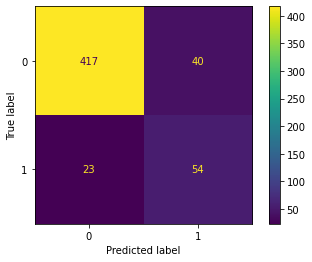

,Accuracy,Precision,Recall,F1
0,0.882022,0.574468,0.701299,0.631579


In [27]:
# evaluate on the training and test set

dtree2_df = evaluate(dtree2_model, x_val, y_val)
dtree2_df

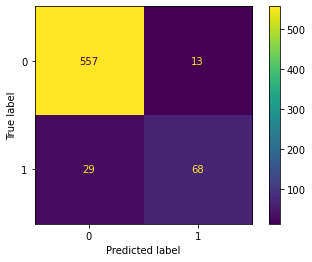

,Accuracy,Precision,Recall,F1
0,0.937031,0.839506,0.701031,0.764045


In [28]:
test = evaluate(dtree2_model, x_test, y_test, threshold = 0.9)
#increasing the threshold optimizes/ improves the precision
test

- increasing the threshold optimizes the precision. The usability of any strategy depends on the objective of the business. Before you can use any strategy, it must align with the objective of the organization. For instance tweaking the threshold is to optimize False Positive (precision). As you can see, FP has increased

## Feature Importances

one attribtute of tree-based models is feature selection; it automatcally help us to score the contributions of each variable to the target variables by scoring the important variables

- Instead of looking at the whole tree, which can be taxing, there are some useful statistics that 
we can derive to summarize the workings of the tree. The most commonly used summary is **feature importance**, 
which rates how important each feature is for the decision a tree makes. It is a number between 0 and
1 for each feature, where 0 means "not used at all" and 1 means "perfectly predicts the target".

In [29]:
dtree2_model.feature_importances_

array([5.02813399e-17, 3.16377251e-01, 0.00000000e+00, 5.80372724e-02,
       2.30389514e-01, 2.39531303e-01, 4.19910594e-03, 7.36760781e-02,
       5.65037279e-02, 2.12857479e-02])

- we can plot a graph to visualize the feature importances

In [30]:
## Plot feature importances
importances = dtree2_model.feature_importances_
def plot_importances(importances):
    indices = np.argsort(importances)
    
    plt.figure(figsize = (12,12))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color ="violet",
            align = "center")
    plt.yticks(range(len(indices)),[feat_names[i] for i in indices])
    plt.xlabel("Relative Importances")
    plt.show()

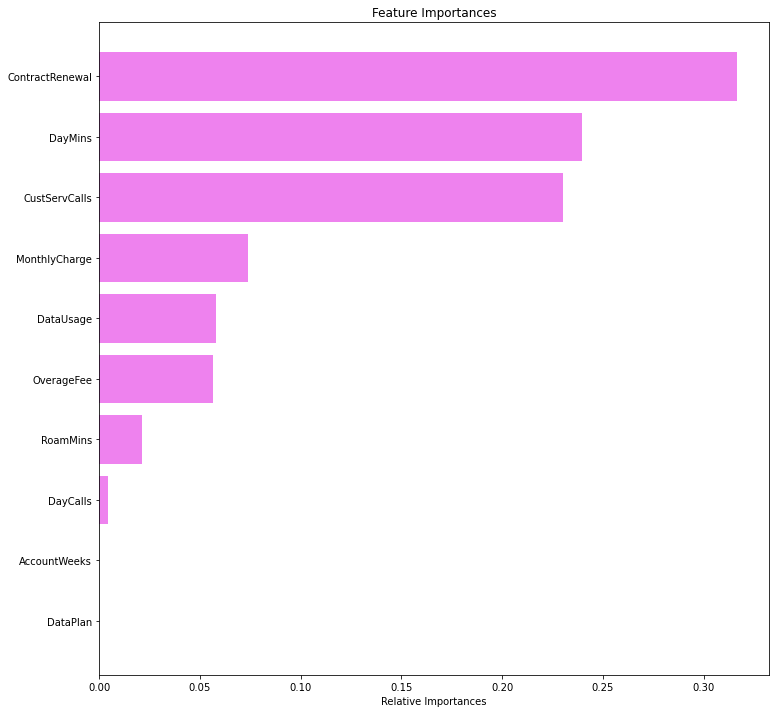

In [31]:
plot_importances(importances)

- contract renewal is the most important in determing whether a customer is about to leave; if a user does not renew their contract, it is an indication that they are about to leave
- day min: if someone is making to much call complaining, it might indicate they are about to leave
- monthly charge: higher monthly charge might indicate they are about to leave

Hence, we can rebuild the model and exclude accountweeks and data plan snce they are not contributing to the target. Once rebuilt, the complexity of the model will be reduced and we will achieve same performance with less features. Organizations using machine learning models to make decisions prefer a simple model because it is fast; they don't want a model that will make their software to be hanging e.g use of google translate hanging during emergency might make customer churn the application. Most organizations use simple models. If a simple model can achieve exactly what a complex model will do, organizations will go with the simple one

## Alternative Way of drawing Decision Tree Models

In [32]:
#pip install pydotplus

In [33]:
# import pydotplus
# from IPython.display import Image

## Create a dot data from the tree

In [34]:

# dot_data = tree.export_graphviz(clf2, out_file = None, feature_names = X.columns,
#                                class_names=["0","1"])

# # create a graph from the dot data
# graph = pydotplus.graph_from_dot_data(dot_data)

# # create the tree image from the graph
# Image(graph.create_png())

## Ensembles of Decision Trees
- Ensembles are methods that combine multiple machine learning models to create
more powerful models.
There are many models in the machine learning literature that belong to this category, 
but there are two ensemble models that have proven to be effective on a wide
range of datasets for classification and regression, both of which use decision trees as
their building block: **Random Forests** and **Gradient Boosted Decision Trees**.
    
    
### Random Forests
-  A main drawback of decision trees is that they tend to overfit the
training data. Random forests are one way to address this problem. Random forests are essentially a collection of
decision trees, where each tree is slightly different from the others.
The idea of random forests is that each tree might do a relatively good job of predicting, 
but will likely overfit on part of the data.
If we build many trees, all of which work well and overfit in different ways, we can
reduce the amount of overfitting by averaging their results.


- To build a tree, we first take what is called a bootstrap sample of our data. A bootstrap
sample means from our n_samples data points, we repeatedly draw an example randomly with 
replacement (i.e. the same sample can be picked multiple times), n_samples times. 
This will create a dataset that is as big as the original dataset, but some
data points will be missing from it, and some will be repeated.



- Next, a decision tree is built based on this newly created dataset. However, the algorithm 
we described for the decision tree is slightly modified. Instead of looking for
the best test for each node, in each node the algorithm randomly selects a subset of
the features, and looks for the best possible test involving one of these features. The
amount of features that is selected is controlled by the **max_features** parameter.




- To make a prediction using the random forest, the algorithm first makes a prediction
for every tree in the forest. For regression, we can average these results to get our final
prediction. For classification, a "soft voting" strategy is used. This means each algorithm 
makes a "soft" prediction, providing a probability for each possible output
label. The probabilities predicted by all the trees are averaged, and the class with the
highest label is predicted.

Ensemble learning methods are made up of a set of models e.g. decision tree and their predictions are aggregated to identify the most popular result. They achieve their goals in 3 different ways - bagging, boosting and stacking <br>

Methods of Ensemble methods
1. **Bagging**: random forest is an extension of bagging. it involves creating multiple models by training them of different subset of the training data. These subsets are created by sampling the original dataset with replacement (picking samples from an original population it different subset and ensurung the number of samples in each subset is equal to the original; however a subset can a sample repeated since it was replaced). This process is known as Bootstraping. Each of the tree generated will be slightly different since the data is slightly different. Each of these models is trained independently and then their predictions are combined either by taking the average or the majority vote. Example of bagging is Random forest model

- **Random forest model** (Bagging of multiple tree or bootstrapping + random feature selection) : it randomly does 2 things. It randomly samples the training data with replacement, creating a new dataset for each tree. foreach dataset, it builds a decision tree by spliting the data based on the feature that best separates the data into different classes or categories. It ramdomly selects the features it calculates entropy or gini for, however you can specify the number of features you want it to select (using max_features). For each split, select a random forest of features to consider instead of considering all the features. This helps to introduce more diversity among the trees and reduce overfitting.

Advantages of Random forest

- reduces overfitting: the use of bootstrapping and random feature selection helps to reduce overffitng and increase the generalization ability of the model

- robustness to multiple data: they are robust to multiple data as they use multiple trees trained on different subset of data
- feature importance: they provide information about the importance of each feature in the prediction which can be useful for feature selection and interpretation

Application
- Image classification
- test classification
- predictive modeling in healthcare and finance

2. Boosting: performs better and used in business. It is a popular ensemble learning method used to improve the accuracy of a model by combining multiple weaker models i.e. sequentially training different models by working on the weakness/ errors of previous ones. Examples include Adaboost and Gradient Boosting

### Implementing Random Forests in scikit learn

In [35]:
# import the random forest model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# instanntiate the classifier
rf = RandomForestClassifier(random_state = 0, n_jobs = -1)
# estimator; by default, it trains 100 trees
# n_jobs; for it to use all the cpu core; to facilitate it

# train the model
rf_model = train(rf, x_train, y_train)

# performance scores
rf_model


Train Accuracy 1.0


RandomForestClassifier(n_jobs=-1, random_state=0)

- it also overfits; let's pre-prune by setting class_weight and max_depth

In [36]:
# create another model using max_depth to prevent overfitting
# import the random forest model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# instantiate the classifier
rf = RandomForestClassifier(random_state = 0, n_jobs = -1,max_depth = 4,class_weight={0:0.15, 1:0.90})
# estimator; by default, it trains 100 trees
# n_jobs; for it to use all the cpu core; to facilitate it

# train the model
rf_model = train(rf, x_train, y_train)

# performance scores
rf_model


Train Accuracy 0.9066604127579737


RandomForestClassifier(class_weight={0: 0.15, 1: 0.9}, max_depth=4, n_jobs=-1,
                       random_state=0)

- train accuracy is 91%

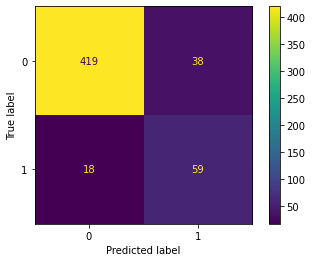

,Accuracy,Precision,Recall,F1
0,0.895131,0.608247,0.766234,0.678161


In [37]:
# evaluate the model
rf_df = evaluate(rf_model, x_val, y_val)
rf_df

- if our objective is recall, we can say random forest is performing better

### Visualizing feature importances for the Random Forests Algorithm

In [38]:
rf_imp = rf_model.feature_importances_
rf_imp

array([0.01346086, 0.1527402 , 0.06082433, 0.07673749, 0.16896371,
       0.24883514, 0.0175634 , 0.17741832, 0.04391724, 0.03953931])

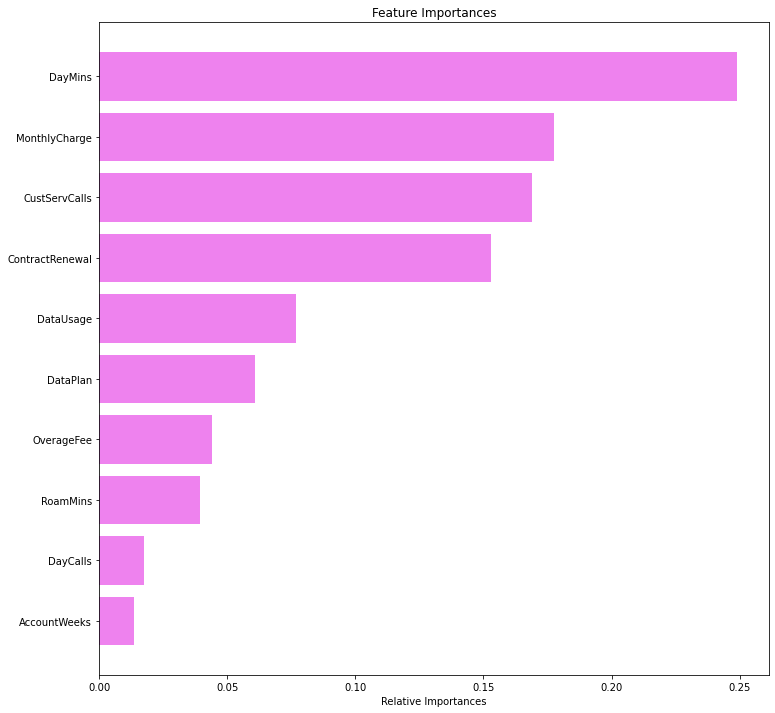

In [39]:
plot_importances(rf_imp)

## Gradient Boosting Machines
- Gradient boosted regression trees is another ensemble method that combines multiple decision trees to a more powerful model. Despite the “regression” in the name,
these models can be used for regression and classification.




- In contrast to random forests, gradient boosting works by building trees in a serial
manner, where each tree tries to correct the mistakes of the previous one. There is no
randomization in gradient boosted regression trees; instead, strong pre-pruning is
used. Gradient boosted trees often use very shallow trees, of depth one to five, often
making the model smaller in terms of memory, and making predictions faster.




- The main idea behind gradient boosting is to combine many simple models (in this
context known as weak learners), like shallow trees. Each tree can only provide good
predictions on part of the data, and so more and more trees are added to iteratively
improve performance.

### Implementing Gradient Boosting in scikit learn

In [40]:
# import the gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the classifier
gb = GradientBoostingClassifier(random_state= 0)
# learning_rate; how strongly you want the mistake to be corrected

# train the model
gb_model = train(gb, x_train, y_train)

# performance scores

Train Accuracy 0.9568480300187617


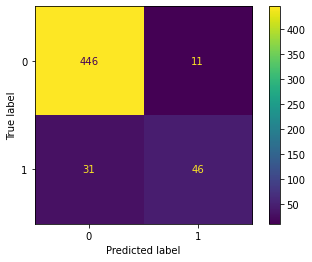

,Accuracy,Precision,Recall,F1
0,0.921348,0.807018,0.597403,0.686567


In [41]:
# evaluate
gb_df = evaluate(gb_model, x_val, y_val)
gb_df

- the recall is low
- this is the default result; the default can not be the best model. There is a need to tweak the parameters

### Reducing Overfitting
- To reduce overfitting, we applt strong pre-pruning by limiting the depth of the tree
- Also, we can adjust the learning rate parameter which controls how each tree tries to correct previous trees. 

### Saving your model

In [42]:
import pickle
fp = open("rf_model.pkl", "wb")
# wb: write mode for models; writing/ saving on a binary mode
pickle.dump(rf_model, fp)
fp.close # it is always safe to close your file

<function BufferedWriter.close>

### Loading your model 

In [43]:
fp_new = open("rf_model.pkl", "rb")
rf_model_new = pickle.load(fp_new)

In [44]:
rf_model_new.feature_importances_

array([0.01346086, 0.1527402 , 0.06082433, 0.07673749, 0.16896371,
       0.24883514, 0.0175634 , 0.17741832, 0.04391724, 0.03953931])

In [45]:
rf_model_new.predict_proba(x_val)

array([[0.74846551, 0.25153449],
       [0.62440226, 0.37559774],
       [0.77540571, 0.22459429],
       ...,
       [0.76148701, 0.23851299],
       [0.76097115, 0.23902885],
       [0.72815885, 0.27184115]])

In [46]:
# limiting the tree's depth to 1


# train the model





In [47]:
# adjusting the learning rate to 0.01


# train the model




## Exercise
- Apply the Random Forests, Gradient Boosting classifiers to the titanic data.
- Also, perform some hyper-parameter tuning to improve the performance of the best model.

## Model Evaluation and Improvement
aim: to ensure that a model is giving consistent result when introduced to a new data; that is why we always split the data to different portion to mimic a new data. Major factor we are concerned about is the generalization performance of the model. This can be achieved by 
1. splitting the data into 2 or 3 sets (train, test and validation) which has been done so far). However, if the data is not too large, we will be having only a small data to train and this could lead to overfitting. Also it is possible that the part of the data we used to train are those that are good or vise versa; the ones the model tht easily identify its patterns. 
2. Cross Validation: this another way to evaluate a model and it combats the problem of splitting; since it uses every portion of the data to test and every portion to train at different point

All these processes involved in building and evaluation of models is called Model Development. When the model has been approved by the software engineers, it will get into production and deployed to serve customers. This leads us to machine learning operations/ engineering
- Having discussed the fundamentals of supervised learning, and
having explored a variety of machine learning algorithms, we will now dive more
deeply into evaluating models and selecting parameters.

- Here, we will expand on two aspects of this evaluation:
    - introduce cross-validation, a more robust way to assess generalization performance than a single
       split of the data into a training and a test set.
    - discuss methods to evaluate classification and regression performance that go beyond the default measures of accuracy and $R^2$ provided by the score method. We will also discuss grid search, an effective method for adjusting the parameters in supervised models for the best generalization performance.
    
  

## Cross-validation


- Cross-validation is a statistical method to evaluate generalization performance in a
more stable and thorough way than using a split into training and test set.
In cross-validation, instead of splitting the data set in to a training set and a test set,
the data is split repeatedly and multiple models are trained.
The most commonly used version of cross-validation is k-fold cross-validation, where
k is a user specified number, usually five or ten. When performing five-fold crossvalidation, the data is first partitioned into five parts of (approximately) equal size,
called folds.

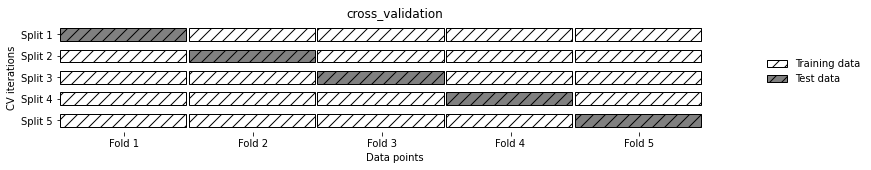

In [48]:
import mglearn
mglearn.plots.plot_cross_validation()

## Cross-validation Implementation in scikit-learn
- Cross-validation is implemented in scikit-learn using the cross_val_score function
from the model_selection module.
The parameters of the cross_val_score function are the model we want to evaluate,
the training data and the ground-truth labels.

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
precision_score,
accuracy_score,
recall_score,
f1_score)


In [50]:
path = "telecom_churn.csv"

df = pd.read_csv(path)

df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### Select features and target

In [51]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

#### Implementing cross validation before training the data - 
Internally, during cross validation, training and testing are done; however it is always better to build a model before undergoing cross validation because cross validation goal is not to save a model. Note that CV can be done before training the model even in the industry just to have a quick overview of how the model will perform

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gb  = GradientBoostingClassifier(random_state=0)
scores = cross_val_score(gb, X , y, scoring = "recall", cv = 5, n_jobs = -1)
# cv = number of cross validations you want to generate
# scoring = recall is the metric we are interested in
# n_jobs:cross validation takes time;hence we are using all the cpu cores
scores

array([0.65979381, 0.64948454, 0.65979381, 0.61458333, 0.69791667])

In [54]:
np.mean(scores)

0.6563144329896907

- on average, this model will give us 65% recall on a new data
- this performance will give us an idea of what to do to improve our model since a similar result will be achieved if we train the model. Model improvement strategies can be used to improve the results after training

#### Implementing cross validation after training the data - 

In [55]:
# split into train, validation and test
# this is how our data should be split in most cases
# all the hyperparameter tuning will be done on validation data
# test data is the standard
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2,
                                                            random_state = 0,
                                                           stratify = y)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val,
                                                 test_size = 0.2,
                                                 random_state = 0,
                                                 stratify = y_train_val)

In [56]:
gb_model = train(gb, x_train, y_train)

Train Accuracy 0.9568480300187617


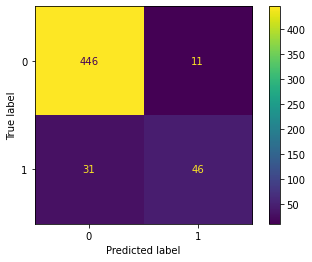

,Accuracy,Precision,Recall,F1
0,0.921348,0.807018,0.597403,0.686567


In [57]:
evaluate(gb_model, x_val, y_val)

recall accuracy is 60 percent which is slighly lower than Cross Validation result. This shows that our model can be able to perform better than this by tweaking the parameters in order to attain the Cross Validation  result and even do better

### model imporovement

1. from the data: Balance the dataset
2. using metrics: tweak the threshold
3. hyper parameter tuning: we will be focussing on this

In [58]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state = 0)

# X_sm, y_sm = smote.fit_resample(X, y)

### Types of Cross validation
1. Stratified K-fold cross validation: sklearn uses this by default. It is used to ensure that the portion of majority and minority classes is similar in both train and test data

2. Standard K-fold cross validation
3. Leave-one-out cross validation: this is using all samples to train and only one sample to test;forinstance, if there are 1000 rows, it uses 999 to train and 1 to test. Hence the cross validation will take place for 1000 times. It is highly computationally intensinve and not commonly used.

### Important note
- It is important to keep in mind that cross-validation is not a way to build a
model that can be applied to new data. Cross-validation does not return a model.
When calling cross_val_score, multiple models are build internally, but the purpose
of cross-validation is only to evaluate how well a given algorithm will generalize when
trained on a specific dataset. 

## Stratified K-Fold Cross-validation
- Splitting the dataset into k-folds by starting with the first 1/k-th part of the data as
described above might not always be a good idea.


-  In stratified cross-validation, we split
the data such that the proportions between classes are the same in each fold as they
are in the whole dataset, as illustrated in the Figure below:

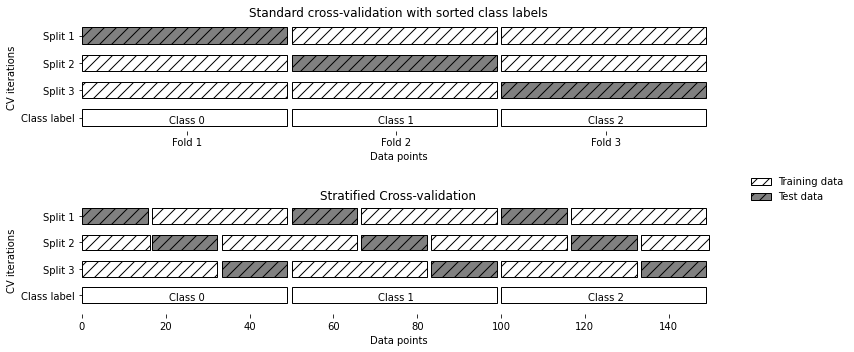

In [59]:
mglearn.plots.plot_stratified_cross_validation()

### Implementing the standard KFold cross-validation in scikit-learn
- By default, scikit-learn uses the standard kfold for regression problems, and stratified kfold for classification problems.
However, we can still initiate the standard kfold for classification problems, even though it is bad idea.


In [60]:
from sklearn.model_selection import KFold

# instantiate it
kfold = KFold(n_splits=5, shuffle = True)
# we want 5 cross validation splits
# shuffle isset to true toshuffle thedata; by default it is false
# ideally Kfold is used for regression and in regression, there are no classes;that is why shuffle is set to false

# create an instance of the Gradient Boosting model
gb1 = GradientBoostingClassifier(random_state=0)

# assign the kfold splitter to the cv parameter in the cross_val_score
scores1 = cross_val_score(gb1, X, y, cv = kfold, scoring = "recall")
# by default cv is stratified; however we are specifying our kfold of 5 split to change to standard kfold
print("KFold scores: {}".format(scores1))

KFold scores: [0.68085106 0.70212766 0.63043478 0.59183673 0.64761905]


#### We can also shuffle the classes for kfold cross-validation

In [61]:
# another way to resolve the issue of standard KFold is to set the shuffle parameter to True
kfold = KFold(n_splits = 3, shuffle=True, random_state = 0)

scores1 = cross_val_score(gb1, x_train, y_train, cv = kfold, scoring = "recall")

print("KFold scores with shuffle: {}".format(scores1))

KFold scores with shuffle: [0.60784314 0.64485981 0.64      ]


## Leave-One-Out cross-validation
- Another frequently used cross-validation method is leave-one-out. You can think of
leave-one-out cross-validation as k-fold cross-validation where each fold is a single
sample. For each split, you pick a single data point to be the test set. This can be very
time-consuming, in particular for large datasets, but sometimes provides better estimates on small datasets.

In [62]:
# from sklearn.model_selection import LeaveOneOut

# loo = LeaveOneOut()

# # assign the loo splitter to the cross_val_score
# scores = cross_val_score(gb, x_train, y_train, cv = loo, scoring = "recall")

# print("Number of iterations: {}".format(len(scores)))
# print("Leave-One-Out mean score: {}".format(scores.mean()))

## Hyperparameter Tuning
this is the process of finding the right combination of hyper parameter values to achieve the maximum performance of the model
examples
- Logisticregression : Penalty function Pe (l1, l2), C,Solver (lgbs,lib,Sag)
- Decision tree: Max_depth, learning_rate, max_features, etc
tweaking each of these hyperparameter is tedious; hence, there is a function where you can input thedifferent values of each hyperparameter and run a loop internally through them and find the value of each hyperparameter that will give the best result
- Here, we discuss how to improve the model's generalization performance by tuning its parameters. The two most common methods 
are:
    - **Grid search**
    - **Randomized search**
    
    
### Grid Search

their goal is to search for the best combination of hyperparameters. Grid search is more computationally intensive. for instance if we need to find the best hyperparameter in max depth, number of trees (estimators), criterion (gini), gridsearch is going to multiply all the values of each hyperparameters to identify the best combination and it will take time. However if time is not an issue, we can use gridsearch since it gives better result than randomized search

- This means trying all possible combinations of the parameters of interest. Consider the case Gradient Boosting. As we discussed in the last class, there are two important parameters: the max_depth and learning_rate. Say we want to try values 0.001, 0.01, 0.1, 1 and 10 for the parameter learning_rate, and 1 through 4 for max_depth. Because we have five different settings for learning_rate and 4 for max_depth that we want to try, we have 20 combinations of parameters in total.

### Simple Grid Search
- We can implement a simple grid-search just as for-loops over the two parameters,
training and evaluating a classifier for each combination:

### Manual grid search

In [63]:
# loop through the combination values of both parameters
best_score = 0
for lr in [0.001, 0.01, 0.1, 1, 10]:
    for md in range(1, 5): # trying max_depth of 1, 2, 3 and 4
        # lr = learning rate
        # md = max_depth
        # we have 2 for loops since we are only trying 2 hyperparameters
        # 5 lr value and 4 md values will run 20 times
        gb = GradientBoostingClassifier(random_state=0, learning_rate=lr, max_depth=md)
        gb.fit(x_train, y_train)
        score = gb.score(x_val, y_val)
        
        if score > best_score:
            best_score = score
            best_parameters = {'Learning_rate': lr, 'Max_depth': md}

print("Best score: {}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.9213483146067416
Best parameters: {'Learning_rate': 0.1, 'Max_depth': 3}


## The dangers of overfitting the parameters and the validation set
- The accuracy we got above may be overly optimistic and not reflect the actually performance on new data because,
we used the test set to select the parameter values.


- In reality, it is best to split our data into training, validation, and test sets, so that we use the training to
build the model, select the parameters with the validation set, and evaluate the model with the selected parameters with
the test set.

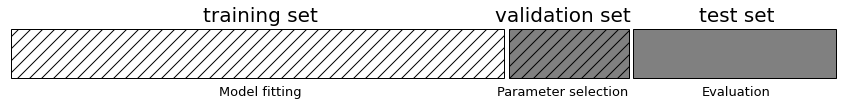

In [64]:
mglearn.plots.plot_threefold_split()

## Implementing Grid Search in scikit-learn
- To use the GridSearchCV class, you first need to specify the
parameters you want to search over using a dictionary. GridSearchCV will then perform 
all the necessary model fits. The keys of the dictionary are the names of parameters 
we want to adjust (as given when constructing the model), in this case C and
gamma, and the values are the parameter settings we want to try out.

In [65]:
# import the grid search model and the estimator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# set the parameters to tune
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1, 10],
             'max_depth': [1, 2, 3, 4]}

# instantiate the models
gb = GradientBoostingClassifier(random_state=0)
grid = GridSearchCV(gb, param_grid, cv = 5, n_jobs = -1, scoring = "recall")


# fit the grid search model on the training set
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 2, 3, 4]},
             scoring='recall')

In [66]:
best_params = grid.best_params_
best_params

{'learning_rate': 10, 'max_depth': 2}

In [67]:
grid.best_score_

0.8153886832363829

- the best learning rate to use is 10
- the best max_depth is 2
- the best score is 81%. Note that if recall is not specified, accuracy score will be shown by default
- now, we can rebuild the model using the best hyperparameter values

In [68]:
# building the models using the best hyperparameters
gb_imp = GradientBoostingClassifier(**best_params, random_state = 0)
# **best_params is a short form for learning_rate = 10, max_depth = 2 in dict form instead of typing them
gb_imp_model = train(gb_imp, x_train, y_train)

Train Accuracy 0.14915572232645402


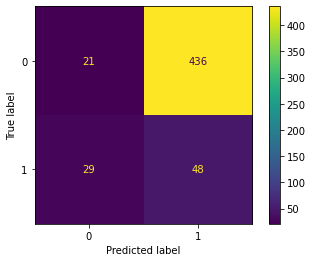

In [69]:
# evaluate the model
gb_imp_df = evaluate(gb_imp_model, x_val, y_val)

In [70]:
# Manually calculate the accuracy of the model since the evaluation function missed it out
y_pred = gb_imp_model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.12921348314606743


In [71]:
# Manually calculate the recall of the model since the evaluation function missed it out
y_pred = gb_imp_model.predict(x_val)
recall = recall_score(y_val, y_pred)
print(f"Recall: {recall}")

Recall: 0.6233766233766234


- the recall we monitored is 62 percent which is not bad
- accuracy is low; 12.9 %
- the grid search is not concerned about the accuracy; based on the objective, our goal is to momitor the recall

#### hyperparameter tuning using Accuracy as standard
this depends on the company's objective

In [72]:
# import the grid search model and the estimator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# set the parameters to tune
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1, 10],
             'max_depth': [1, 2, 3, 4]}

# instantiate the models
gb = GradientBoostingClassifier(random_state=0)
grid = GridSearchCV(gb, param_grid, cv = 5, n_jobs = -1, scoring = "accuracy")


# fit the grid search model on the training set
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 2, 3, 4]},
             scoring='accuracy')

In [73]:
best_params = grid.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 2}

- the optimal parameters that will improve the accuracy are the learning rate of 0.1 and max depth of 2

In [74]:
grid.best_score_

0.9268210355026334

the best mean cross-validated score achieved during the grid search for the metric we are interested in is is 92.6 percent

In [75]:
# building the models using the best hyperparameters to boost accuracy
gb_imp = GradientBoostingClassifier(**best_params, random_state = 0)
gb_imp_model = train(gb_imp, x_train, y_train)

Train Accuracy 0.9460600375234521


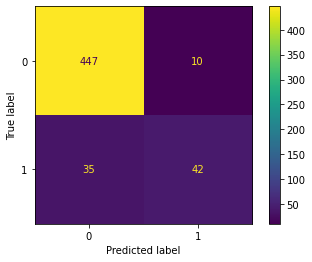

In [76]:
# evaluate the model
gb_imp_df = evaluate(gb_imp_model, x_val, y_val)

In [77]:
# Manually calculate the accuracy of the model since the evaluation function missed it out
y_pred = gb_imp_model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9157303370786517


In [78]:
# Manually calculate the recall of the model since the evaluation function missed it out
y_pred = gb_imp_model.predict(x_val)
recall = recall_score(y_val, y_pred)
print(f"Recall: {recall}")

Recall: 0.5454545454545454


#### Randomized search
unlike Gridsearch that tries all the values in each hyperparameter to find the best combination, randomized search will try all the hyperparameters but randomly pick values to try out, it doesn't try out all the values. It doesnt give a better result but in most cases the results are similar. It is faster, hence if time is of essence, use randomized size

In [79]:
### Hyperparameter tuning using randomizedsearch
# let us try out precision as standard

In [80]:
# import the grid search model and the estimator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# set the parameters to tune
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1, 10],
             'max_depth': [1, 2, 3, 4]}

# instantiate the models
gb = GradientBoostingClassifier(random_state=0)
rand = RandomizedSearchCV(gb, param_grid, cv = 5, n_jobs = -1, scoring = "precision")


# fit the grid search model on the training set
rand.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'max_depth': [1, 2, 3, 4]},
                   scoring='precision')

In [83]:
best_params = rand.best_params_
best_params

{'max_depth': 4, 'learning_rate': 0.01}

In [84]:
rand.best_score_

0.8808089982361812

In [85]:
# building the models 
gb_imp = GradientBoostingClassifier(**best_params, random_state = 0)
gb_imp_model = train(gb_imp, x_train, y_train)

Train Accuracy 0.924953095684803


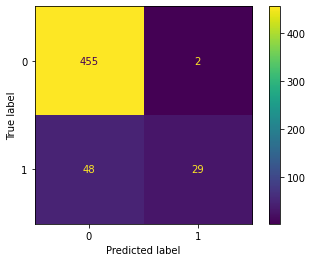

In [86]:
# evaluate the model
gb_imp_df = evaluate(gb_imp_model, x_val, y_val)

In [87]:
# Manually calculate the precision 
y_pred = gb_imp_model.predict(x_val)
precision = precision_score(y_val, y_pred)
print(f"Precision: {precision}")

Precision: 0.9354838709677419


- precision is 100 percent ; this depends on what we are optimizing for

In [88]:
# Manually calculate the recall 
y_pred = gb_imp_model.predict(x_val)
recall = recall_score(y_val, y_pred)
print(f"Recall: {recall}")

Recall: 0.37662337662337664


- recall is very low
- for us to have a balance between them, we can optimize F1


#### Optimizing F1

In [89]:
# import the grid search model and the estimator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# set the parameters to tune
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1, 10],
             'max_depth': [1, 2, 3, 4]}

# instantiate the models
gb = GradientBoostingClassifier(random_state=0)
rand = RandomizedSearchCV(gb, param_grid, cv = 5, n_jobs = -1, scoring = "f1")


# fit the grid search model on the training set
rand.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'max_depth': [1, 2, 3, 4]},
                   scoring='f1')

In [90]:
best_params = rand.best_params_
best_params

{'max_depth': 4, 'learning_rate': 0.1}

In [91]:
rand.best_score_

0.7061334293382975

In [92]:
# building the models 
gb_imp = GradientBoostingClassifier(**best_params, random_state = 0)
gb_imp_model = train(gb_imp, x_train, y_train)

Train Accuracy 0.9727954971857411


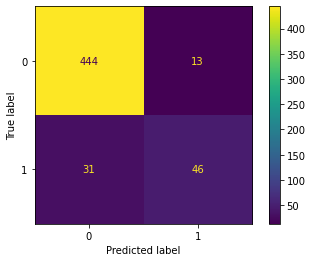

In [93]:
# evaluate the model
gb_imp_df = evaluate(gb_imp_model, x_val, y_val)

In [94]:
# Manually calculate the f1 
from sklearn.metrics import f1_score  # import the f1_score function
y_pred = gb_imp_model.predict(x_val)  # get the predicted labels on validation set
f1 = f1_score(y_val, y_pred)  # calculate f1 score using true and predicted labels
print(f"F1: {f1}")  # print the f1 score

F1: 0.676470588235294


In [95]:
# Manually calculate the precision 
y_pred = gb_imp_model.predict(x_val)
precision = precision_score(y_val, y_pred)
print(f"Precision: {precision}")

Precision: 0.7796610169491526


In [96]:
# Manually calculate the Recall 
y_pred = gb_imp_model.predict(x_val)
recall = recall_score(y_val, y_pred)
print(f"Recall: {recall}")

Recall: 0.5974025974025974


- 68% is the is the best f1 we can
- however we can increase the number of hyperparameter we want to tune/tweak to get better results; however, this would take time

## Exercise
- Using the titanic data with you, build a model to predict if a person survived or not.


### Tasks
- Explore the data

- Visualize some of the features

- Check for missing values and find a suitable method of dealing with the missing values

- split the features and target into training, validation, and test sets

- standardize the data

- Fit Logistic regression, Decision Trees, Random Forests, and Gradient Boosting on the titanic data

- Perform a Grid Search with cross-validation on the parameters of the best model obtain via validation set

- What is your generalization score (Recall on the test set)?



### Automatic Hyperparameter Tuning 

it will work if it specify model for it and it will check  all the parameters in that model and look for the best hyperparaters. We can give it multiple models to try out and get the best hyperparameters.

here, we will be using the hyperopt package to automatically search for the best model and hyperparameters

#### What is Hyperopt
- Hyperopt is a powerful python library for hyperparameter optimization developed by James Bergstra. Hyperopt uses a form of Bayesian optimization for parameter tuning that allows you to get the best parameters for a given model. It can optimize a model with hundreds of parameters on a large scale.

it tunes the model using bayesian approach. There is a type of Bayesian called Tree of Persent Extimator which is the algoritm it uses. It is similar to gridsearch but if gives you the opportunity to define an objective function you want to monitor. Hyperopt is faster and more comprehensive than gridsearch. You dont need to pass a list of values for it; it will randomly pick and it does Cross Vlaidation internally

5 things to take into consideration

- the search space
- the objective
- the algorithm TPE
- Maximum number of evaluation: most times we try 50 and above; but to save time, we can do only 20
- the trials object (optional)

In [97]:
#install hyperopt package
# !pip install hyperopt

In [98]:
# scikit learn has its own special hyperopt package which can be used for deeper projects
# pip install hpsklearn
# however it will not be advisable to install both package has it will affect the system
# also to install sklearn version, you should firstly clone the package using github
# ! git clone https://github.com/jaberg/hyperopt.git

In [99]:
#read in hyperopt values 
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#### Tuning single hyperparameter

let's define the objective function

In [110]:
# define the function we want to minimise
def objective (n_estimators):
    model = RandomForestClassifier (n_estimators=n_estimators,
                                    random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    fn = np.sum(np.logical_and(y_val == 1, y_pred == 0))
    # false negative is when someone is meant to be 1 (e.g. churn) but the model is predicting 0 (not churn)
    return {'loss': fn, 'status': STATUS_OK}

In [111]:
# # if we are optimizing for accuracy
# #define the function we want to minimise
# def objective (n_estimators):
#     model = RandomForestClassifier (n_estimators-n_estimators,
#                                     random_state=0)
#     model.fit(x_train, y_train)
#     y_pred model.predict(x_val)
#     #fn np.sum(np.logical and (y_val == 1, y_pred == 0))
#     acc =  accuracy_score (y_val, y_pred)
#     loss = 1 -acc
#     return ('loss' loss, 'status': STATUS_OK)

In [112]:
#define the values to search over for n_estimators 
search_space = hp.randint('n_estimators', 200, 1000) 
# n_estimators is the hyperparameter of choice and we want to search for the best values between 200-1000 estimators

In [113]:
# set the hyperparam tuning algorithm 
algorithm = tpe.suggest 
# here we specify the algorithm we want; however there are lots of them so we indicated that the machine should suggest

In [119]:
best_params = fmin(fn=objective, space=search_space, algo=algorithm, max_evals=30)

100%|██████████████████████████████████████████████████████████████| 30/30 [01:51<00:00,  3.72s/trial, best loss: 29.0]


In [120]:
best_params

{'n_estimators': 872}

- now we can rebuild the model with 872 number of estimtors

In [127]:
# rebuilding model
rf = RandomForestClassifier(**best_params, random_state = 0, n_jobs = -1,
                        class_weight = {0:0.1, 1:0.9})
rf_model = train(rf, x_train, y_train)

Train Accuracy 1.0


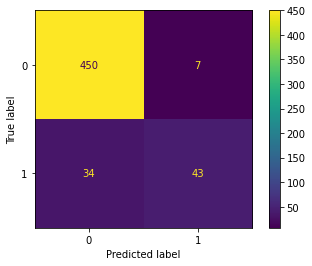

,Accuracy,Precision,Recall,F1
0,0.923221,0.86,0.558442,0.677165


In [128]:
evaluate(rf_model, x_val, y_val)

- there are lots of errors as the recall is still very low

#### Tuning multiple hyperparameter

In [153]:
# redefine the function usng a wider range of hyperparameters
def objective(search_space): 
    # we are passing a dict that will contain all the different hyperparameters
    model = RandomForestClassifier (**search_space, random_state=0)
    model.fit(x_train, y_train)
    y_pred=model.predict(x_val)
    fn = np.sum(np.logical_and(y_val== 1, y_pred == 0))
    return {'loss': fn, 'status': STATUS_OK}
# new search space
search_space={'n_estimators':hp.randint('n_estimators',200,1000),  # try a random intergarbetween 200 and 1000
              'max_depth': hp.randint('max_depth',3,7),
              'min_samples_split':hp.uniform('min_samples_split',0,1),
             'min_samples_leaf':hp.randint('min_samples_leaf',1,10),
             "criterion": hp.choice("criterion", ["gini", "entropy"]), # choice is used when picking between categorical params
             "max_features":hp.choice("max_features", ["sqrt", "log2"])}
              
# for numeric we use randint and uniform to select 
# for categorical, we use choice

# implement Hyperopt
best_params = fmin(fn=objective, space=search_space, algo=algorithm, max_evals=30)

100%|██████████████████████████████████████████████████████████████| 30/30 [01:09<00:00,  2.30s/trial, best loss: 38.0]


In [154]:
best_params

{'criterion': 1,
 'max_depth': 5,
 'max_features': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 0.005079169665068821,
 'n_estimators': 784}

- these are the best hyperparameters randomly chosen by the hyperopt
- criterion is the index of the best criterion indicating entropy however we cannot pass it directly into the model since it is an int and the actual crieterion is categorical, hence we will use space_eval to identify the exact hyperparameters rathan that its index

In [155]:
# let's identify the exact hyperparameters rather that the indices
new_params = space_eval(search_space, best_params)
new_params

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 0.005079169665068821,
 'n_estimators': 784}

In [156]:
# rebuilding model
rf2 = RandomForestClassifier(**new_params, random_state = 0, n_jobs = -1,
                        class_weight = {0:0.1, 1:0.9})
rf_model2 = train(rf2, x_train, y_train)

Train Accuracy 0.8977485928705441


- the training accuracy reduced to 90% showing that the model is no longer overfitting

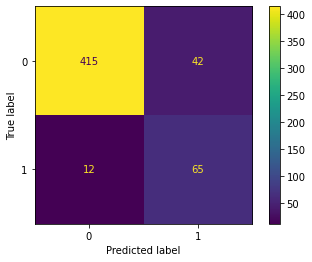

,Accuracy,Precision,Recall,F1
0,0.898876,0.607477,0.844156,0.706522


In [157]:
evaluate(rf_model2, x_val, y_val)

- the recall has improved since False Negative is what we are optimizing for and it is the one that concerns recall
- this is just the basic way to implement hyperopt
- the more advanced way to implement hyperopt requures the scikit learn hyperopt package

#### Implementing hpkslearn

In [ ]:
from hpsklearn import any_classifier, any_preprocessing
from hpsklearn import HyperoptEstimator

In [ ]:
HyperoptEstimator(classifier = any_classifier, 
                  preprocessing = any_preprocessing) 

- this method is going to take a long time
- it is going to try out different classifiers, different decision trees and when it get's to adaboost, it will return error because there are some arguments in adaboost that don't align with it
- this method will give us the best model and the best hyperparameters